In [180]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Start

### Data loader

In [181]:
data = pd.read_csv('Crop_recommendation.csv')
data[10:]

,N,P,K,temperature,humidity,ph,rainfall,label
10,91,53,40,26.527235,81.417538,5.386168,264.614870,rice
11,90,46,42,23.978982,81.450616,7.502834,250.083234,rice
12,78,58,44,26.800796,80.886848,5.108682,284.436457,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [182]:
df = data

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [184]:
df.value_counts(), df.label.value_counts()

(N    P    K    temperature  humidity   ph        rainfall    label      
 0    5    36   24.351938    90.886124  6.152907  105.529185  pomegranate    1
 69   60   54   36.322681    93.061344  6.989927  141.173693  papaya         1
      37   42   23.058049    83.370118  7.073454  251.055000  rice           1
      46   41   23.641248    80.285979  5.012140  263.110330  rice           1
      47   40   25.371227    76.240367  6.130136  183.827079  jute           1
                                                                            ..
 26   126  195  21.413638    92.991245  5.878569  118.397907  apple          1
      122  202  22.445170    94.737635  5.617227  107.184327  apple          1
      121  201  22.191094    90.025751  6.162034  112.312663  apple          1
      80   83   17.084985    16.145658  7.528600  71.310073   chickpea       1
 140  45   15   25.530827    80.046628  5.801048  99.395572   cotton         1
 Name: count, Length: 2200, dtype: int64,
 label
 rice   

In [185]:
df.isnull().sum()*100

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [186]:
df.shape

(2200, 8)

In [187]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Data evaluation

Visualizing

In [188]:
def resize():
    plt.figure(figsize=(6,6))


<Axes: >

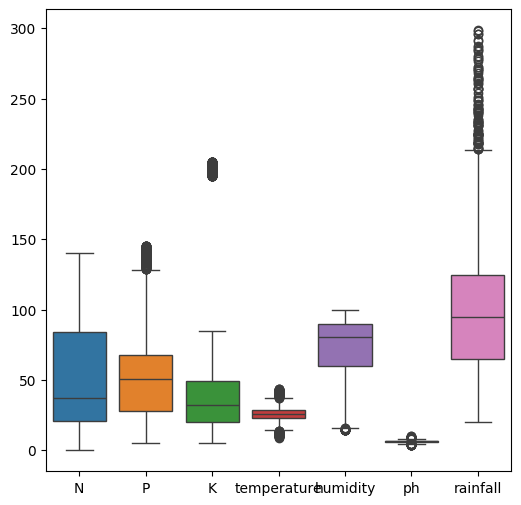

In [189]:
resize()
sns.boxplot(df)

<Axes: ylabel='P'>

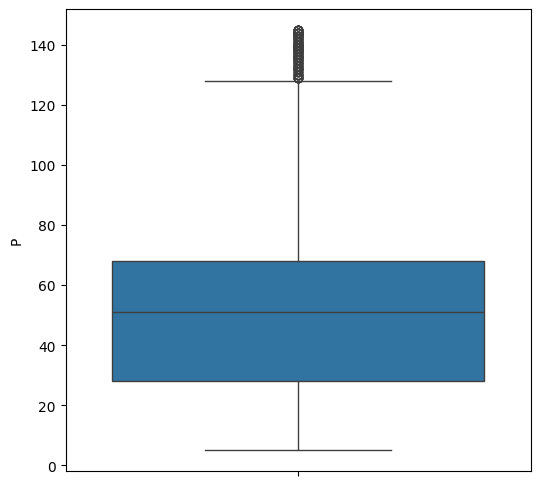

In [190]:
resize()
sns.boxplot(df.P)

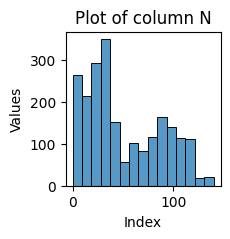

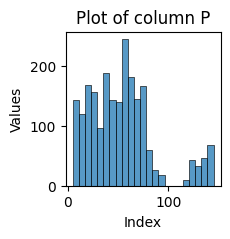

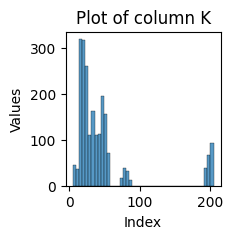

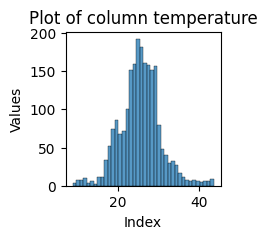

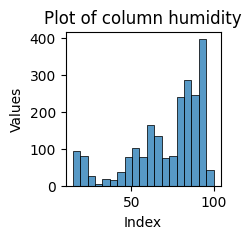

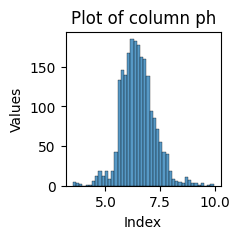

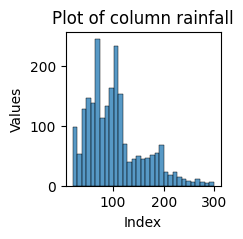

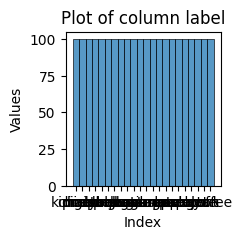

In [191]:

for column in df.columns:
  plt.figure(figsize=(2,2))
  sns.histplot(data=df, x=df[column])
  plt.title(f'Plot of column {column}')
  plt.xlabel('Index')
  plt.ylabel('Values')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_27684\357019477.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.P, ax=ax[0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_27684\357019477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.K, ax=ax[1])
c:\Users\Acer\.pyenv\pyenv-win\versions\3.

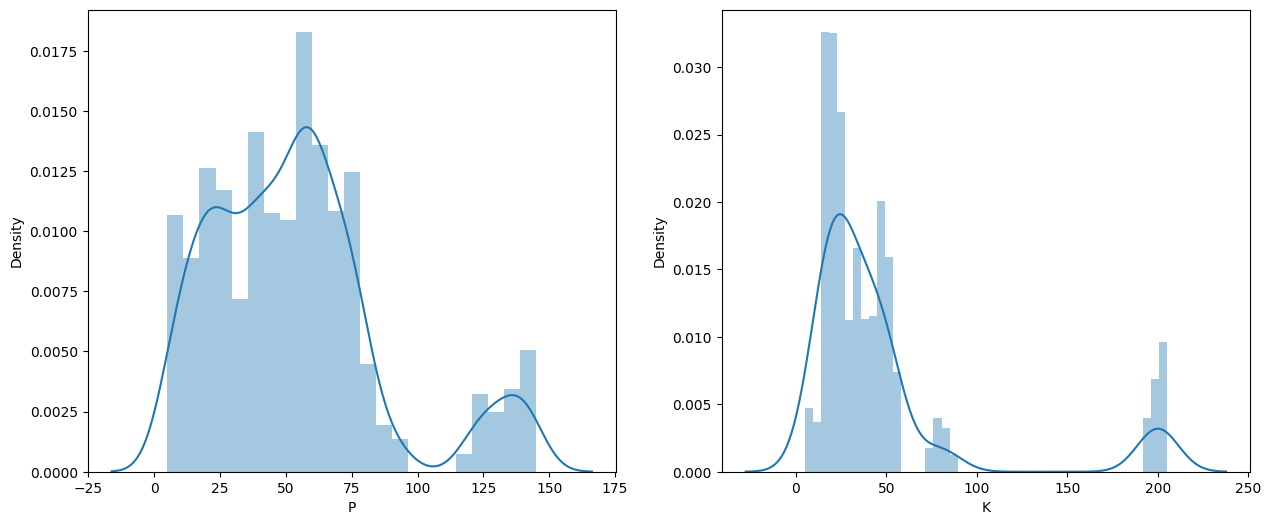

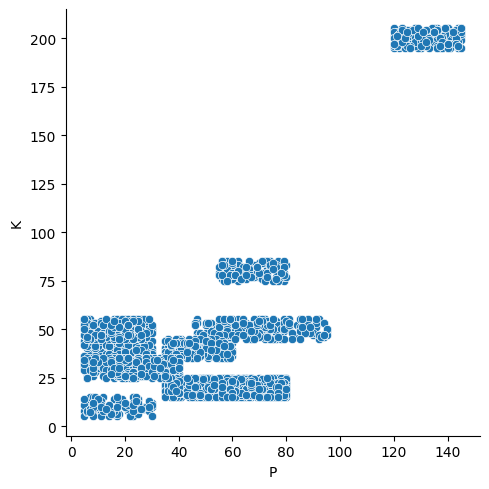

In [192]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df.P, ax=ax[0])
sns.distplot(df.K, ax=ax[1])

sns.relplot(x=df.P, y=df.K,data=df)

c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


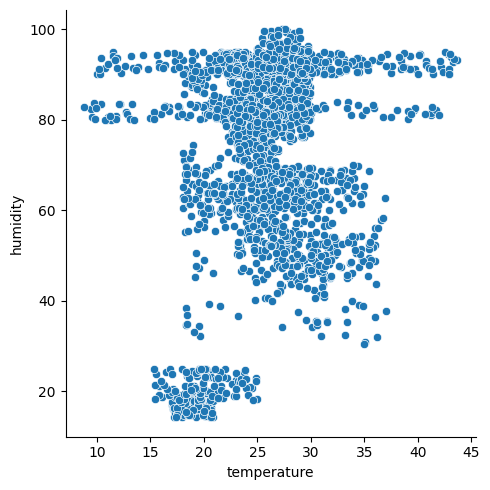

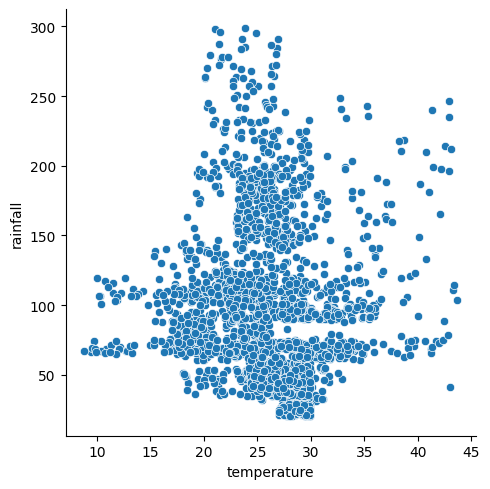

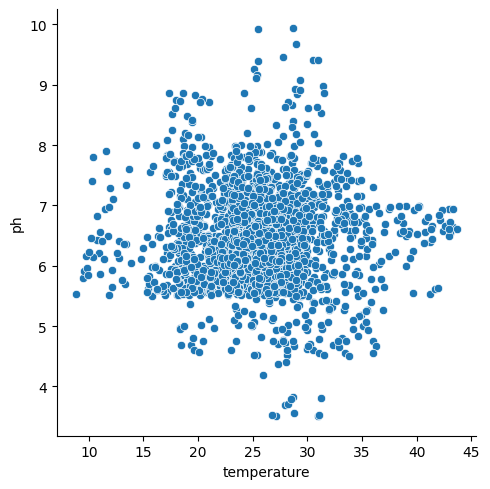

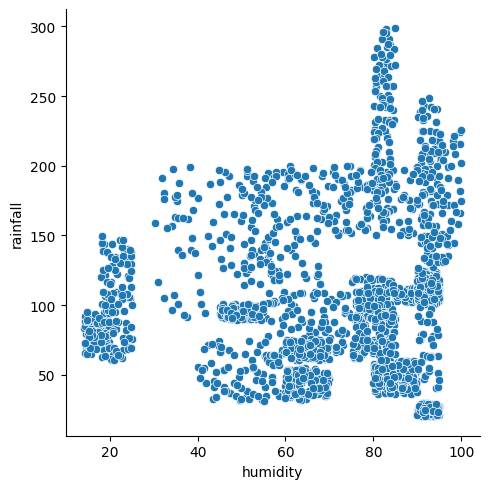

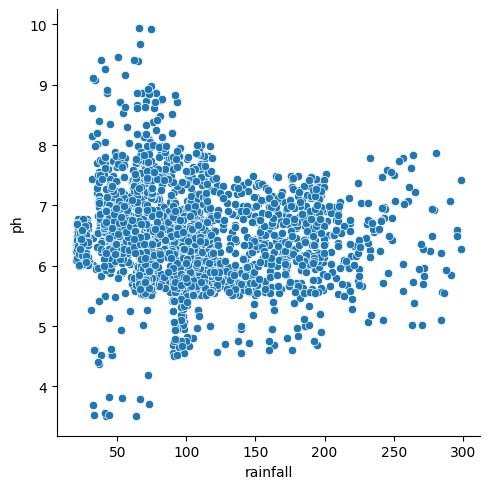

In [193]:
sns.relplot(x=df.temperature, y=df.humidity, data=df)
sns.relplot(x=df.temperature, y=df.rainfall, data=df)
sns.relplot(x=df.temperature, y=df.ph, data=df)
sns.relplot(x=df.humidity, y=df.rainfall, data=df)
sns.relplot(x=df.rainfall, y=df.ph, data=df)

The dataset is not clean. So we need to cleaning our dataset manually

Convert label column to numeric

In [194]:
# Copy the dataframe into the other dataframe
df_ = df.copy()

In [195]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_.label = label_encoder.fit_transform(df_.label)
df_.label

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

<Axes: >

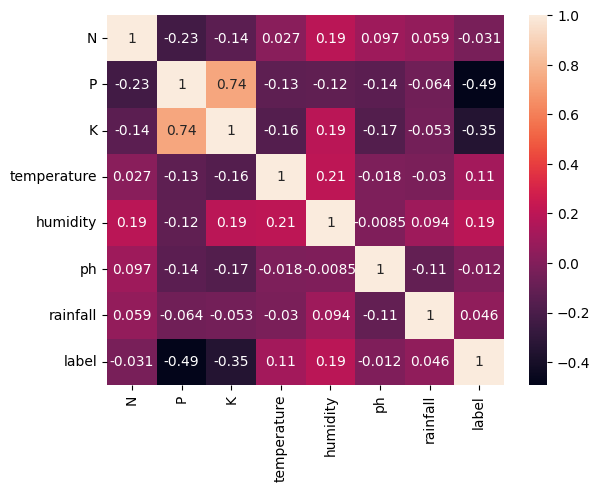

In [196]:
sns.heatmap(data=df_.select_dtypes(include="number").corr(), annot=True)

In [197]:
def plotQ(x: np.ndarray) -> None:
  for column in x.columns:
    # Assume 'column_name' is the column containing the values you want to check for outliers
    Q1 = x[column].quantile(0.25)
    Q3 = x[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers (for example, 1.5 times the IQR)
    threshold = 1.5

    # Count the number of outliers
    outliers_count = ((x[column] < (Q1 - threshold * IQR)) | (x[column] > (Q3 + threshold * IQR))).sum()
    percent = (outliers_count/x[column].sum())*100
    print(f"Number of outliers: {outliers_count} in {column} with {percent}%")


In [198]:
plotQ(df_)

Number of outliers: 0 in N with 0.0%
Number of outliers: 138 in P with 0.11754885091739213%
Number of outliers: 200 in K with 0.18880749188127785%
Number of outliers: 86 in temperature with 0.15260203376067358%
Number of outliers: 30 in humidity with 0.019076698685433092%
Number of outliers: 57 in ph with 0.4004818107135511%
Number of outliers: 100 in rainfall with 0.04393286248382255%
Number of outliers: 0 in label with 0.0%


c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


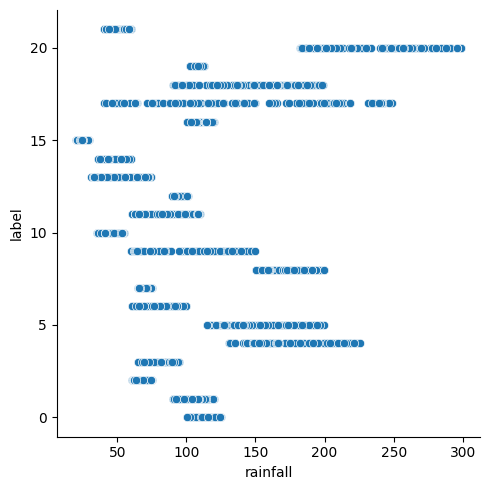

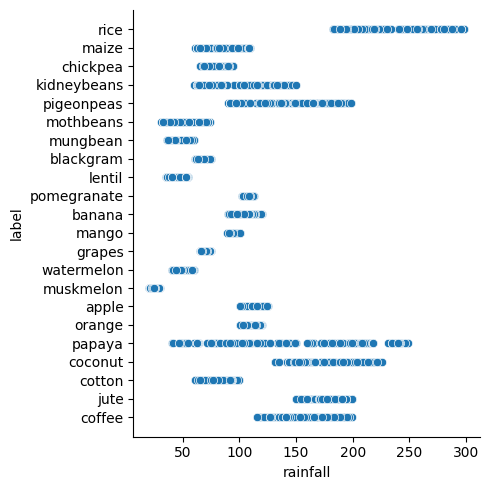

In [199]:

sns.relplot(x=df_.rainfall, y=df_.label, data=df_)
sns.relplot(x=df.rainfall, y=df.label, data=df)

## Outlier processing

### Using `Inter Quartile Range (IQR)` for outliers handing 

Alternatively, we can mathematically define outlier candidates based on a feature’s statistical properties. Let’s first define some terms we’ll adopt.

A quartile divides the observations into four parts. Q_1 is called the first quartile, and it represents the 25th percentile of the dataset. Similarly, Q_3 denotes the third quartile and marks the 75th percentile of the data.

Progressing further, we define the interquartile range as:  
`IQR = Q_3 - Q_1`
In the quartile analysis method, we define the values falling outside the 
We can visualize the quantile analysis with the help of boxplots. The boxplot’s ends mark the quartiles. Additionally, the median is marked on the plot. The whiskers indicate the  data range

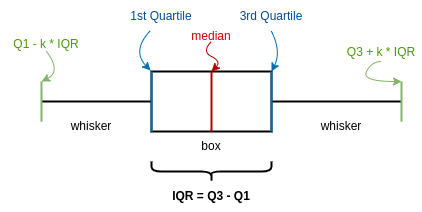

In [200]:
def filter_outliers(x: np.ndarray, threshold: float):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return x[(x >= lower_bound) & (x <= upper_bound)]

In [201]:
df_filtered = df_.copy()

for column in df_.columns:
  df_filtered[column] = filter_outliers(df_[column], 1.5)

# df_filtered = filter_outliers(df_.P, 1)

In [202]:
# Assume 'column_name' is the column containing the values with outliers
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (for example, 1.5 times the IQR)
threshold = 1.5

outliers_count = ((df_filtered < (Q1 - threshold * IQR)) | (df_filtered > (Q3 + threshold * IQR))).sum()
percent = (outliers_count/df_filtered.sum())*100
outliers_count, percent

(N               0
 P              62
 K              28
 temperature     7
 humidity       33
 ph              6
 rainfall       42
 label           0
 dtype: int64,
 N              0.000000
 P              0.063027
 K              0.042471
 temperature    0.012970
 humidity       0.021044
 ph             0.043435
 rainfall       0.020691
 label          0.000000
 dtype: float64)

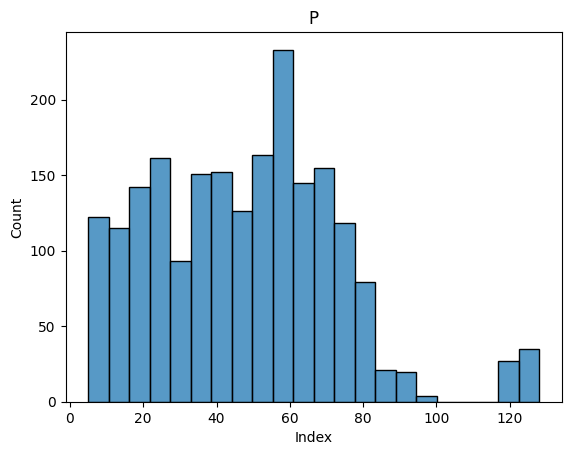

In [203]:
sns.histplot(data=df_filtered, x=df_filtered.P)
plt.title("P")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

<Axes: >

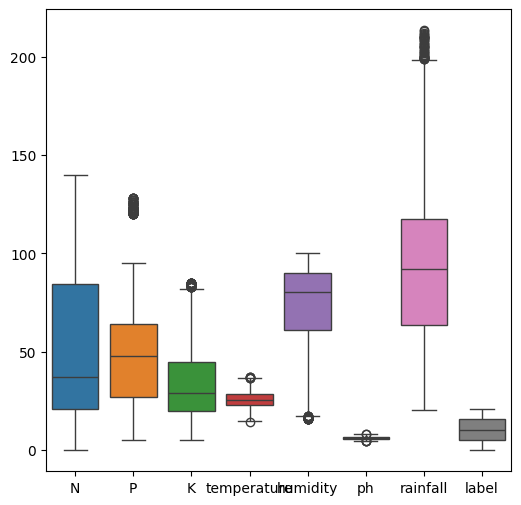

In [204]:
resize()
sns.boxplot(df_filtered)

In [205]:
df_filtered.isnull().sum()

N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
label            0
dtype: int64

In [206]:
def Fillna(x:np.ndarray):
  for column in x.columns:
    x[column] = x[column].fillna(x[column].mean())
Fillna(df_filtered)

In [207]:
df_filtered = df_filtered.dropna(axis=0)

### Using `Z-Score`

Z-score measures the variance of an observation from the mean in terms of standard deviation, assuming a normal distribution.

To calculate z-score, we transform the data into a normally distributed bell curve, with mean  and standard deviation . Then, we calculate the z-score of an observation x:   

Finally, we define a threshold range and mark the observations falling outside the range as outliers.

Let’s recall the empirical rule and coverage of standard deviation around the mean:  
-  cover 68.27%
-  covers 95.45%
-  covers 95.45%

Usually, we round the numbers and call the coverages to be `68 – 95 – 99.7`:  
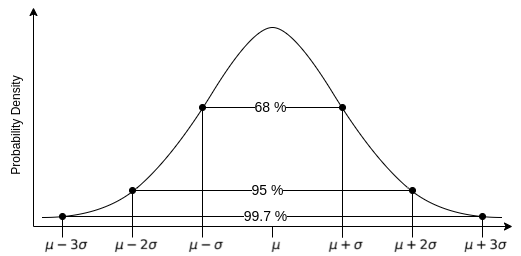   
Some common z-score threshold values are 2.5, 3.0, and 3.5. Based on the selected threshold value, we mark the observation with greater absolute z-scores as outliers:  


In [208]:
from scipy import stats

# Calculate Z-score for column 'P'
z_scores = stats.zscore(df_['P'])

# Define a threshold for outliers (for example, 3)
threshold = 2

# Filter the DataFrame to remove outliers based on Z-score in column 'P'
df_filtered_v2 = df_[(z_scores < threshold)]


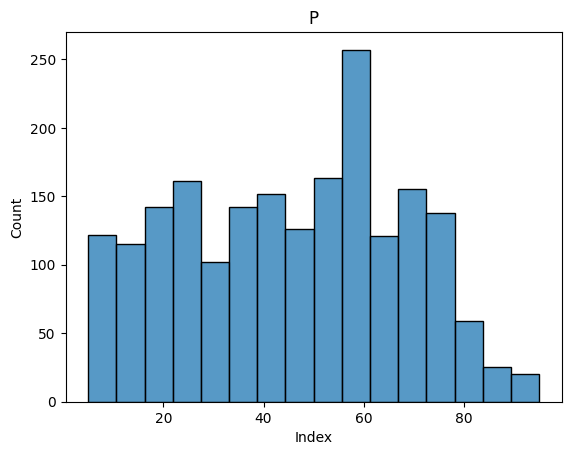

In [209]:
df_filtered_v2.P
sns.histplot(data=df_filtered_v2, x=df_filtered_v2.P)
plt.title("P")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='P'>

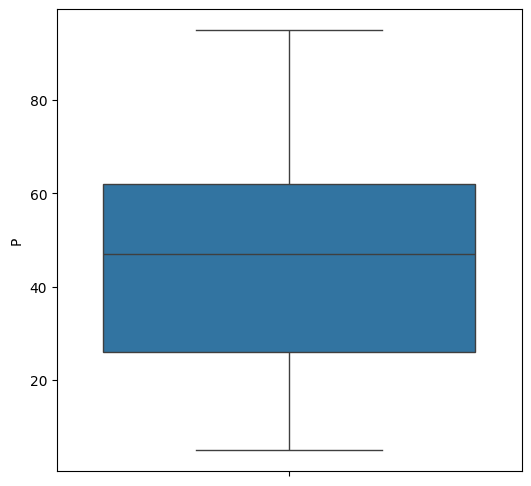

In [210]:
resize()
sns.boxplot(df_filtered_v2.P)

In [211]:
from sklearn.preprocessing import StandardScaler
import numpy as np


def Log_transfrom(x: np.ndarray) -> np.ndarray:
  for column in x.columns[:len(x.columns)-1]:

    scaler = StandardScaler()
    x[column] = scaler.fit_transform(x[[column]])

    x[column] = np.log(x[column])
    x[column] = np.sqrt(x[column])
Log_transfrom(df_filtered_v2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_27684\3406140885.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = scaler.fit_transform(x[[column]])
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Acer\AppData\Local\Temp\ipykernel_27684\3406140885.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = np.log(x[column])
c:\Users\Acer\

In [212]:
df_filtered_v2.isnull().sum()

N              1548
P              1634
K              1672
temperature    1766
humidity       1775
ph             1720
rainfall       1634
label             0
dtype: int64

## Model 

### Split dataset

In [213]:
from sklearn.model_selection import train_test_split

# With df_ datasets
features_df_ = df_.drop(columns=['label'])
target_df_ = df_['label']

X_train_df_, X_test_df_, y_train_df_, y_test_df_ = train_test_split(features_df_, target_df_, 
                                                                    train_size=0.8, shuffle=True)

# With df_filtered_ datasets
features = df_filtered.drop(columns=['label'])
target = df_filtered['label']
X_train_, X_test_, y_train_, y_test_ = train_test_split(features, target, 
                                                                    train_size=0.8, shuffle=True)

### Cross validation accuracy

In [214]:
from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):
    # This function calculates the mean cross validation accuracy
    score = cross_val_score(model, features, target,cv=5)
    #get the mean of each fold 
    return score.mean() * 100

In [215]:
model_evaluate = {}

### Logistic regression


In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Original data


In [217]:
lgs = LogisticRegression(verbose=1)

lgs.fit(X_train_df_, y_train_df_)

# Use the model to make predictions on the test data
ypred = lgs.predict(X_test_df_)

accuracy = accuracy_score(y_test_df_, ypred)
matrix = confusion_matrix(y_test_df_, ypred)
report = classification_report(y_test_df_, ypred)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["LogisticRegression Origin data"] = accuracy*100
model_evaluate

Accuracy: 0.9522727272727273

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       0.94      0.71      0.81        21
           3       1.00      1.00      1.00        22
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        23
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        16
           8       0.79      0.88      0.83        17
           9       0.92      1.00      0.96        12
          10       0.84      0.94      0.89        17
          11       0.88      1.00      0.94        23
          12       0.96      1.00      0.98        27
          13       0.80      0.80      0.80        20
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
          16       1.00     

c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression Origin data': 95.22727272727273}

Scale data frame

In [218]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_df_)
x_test_scaled = scaler.fit_transform(X_test_df_)

lgs.fit(X_train_scaled, y_train_df_)

y_pred_scaled = lgs.predict(x_test_scaled)

accuracy = accuracy_score(y_test_df_, y_pred_scaled)
matrix = confusion_matrix(y_test_df_, y_pred_scaled)
report = classification_report(y_test_df_, y_pred_scaled)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

Accuracy: 0.9613636363636363

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        16
           8       0.77      1.00      0.87        17
           9       0.80      1.00      0.89        12
          10       0.89      1.00      0.94        17
          11       0.96      1.00      0.98        23
          12       0.96      1.00      0.98        27
          13       1.00      0.75      0.86        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00     

Data cleaned

In [219]:
scaler = StandardScaler()

X_train_scaled_ = scaler.fit_transform(X_train_)
x_test_scaled_ = scaler.fit_transform(X_test_)

lgs.fit(X_train_scaled_, y_train_)

y_pred_scaled_ = lgs.predict(x_test_scaled_)

accuracy = accuracy_score(y_test_, y_pred_scaled_)
matrix = confusion_matrix(y_test_, y_pred_scaled_)
report = classification_report(y_test_, y_pred_scaled_)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["LogisticRegression data cleaned"] = accuracy*100
model_evaluate


Accuracy: 0.9590909090909091

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.97        18
           7       0.87      1.00      0.93        20
           8       0.69      0.65      0.67        17
           9       1.00      1.00      1.00        20
          10       1.00      0.93      0.97        30
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       0.95      0.95      0.95        19
          14       1.00      0.95      0.98        21
          15       1.00      1.00      1.00        16
          16       1.00     

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909}

## Decision tree

In [220]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",
                                    random_state = None,
                                    max_depth = 5)
# Fitting the training set to create a model
DecisionTree.fit(X_train_df_,y_train_df_)
# Using test(x) to find y
ypred = DecisionTree.predict(X_test_df_)
# Checking whether the predicted y for test(x) matches actual test(y)
accuracy = accuracy_score(y_test_df_, ypred)
matrix = confusion_matrix(y_test_df_, ypred)
report = classification_report(y_test_df_, ypred)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["Decision tree origin data"] = accuracy*100
model_evaluate

Accuracy: 0.875

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       0.34      1.00      0.51        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      0.87      0.93        23
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        16
           8       1.00      0.35      0.52        17
           9       1.00      1.00      1.00        12
          10       0.94      1.00      0.97        17
          11       0.88      1.00      0.94        23
          12       1.00      0.93      0.96        27
          13       1.00      0.45      0.62        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.

c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5}

In [221]:
DecisionTree.fit(X_train_,y_train_)
# Using test(x) to find y
ypred_ = DecisionTree.predict(X_test_)
# Checking whether the predicted y for test(x) matches actual test(y)
accuracy = accuracy_score(y_test_, ypred_)
matrix = confusion_matrix(y_test_, ypred_)
report = classification_report(y_test_, ypred_)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["Decision tree data cleaned"] = accuracy*100
model_evaluate

Accuracy: 0.9181818181818182

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       0.75      1.00      0.86        18
           3       1.00      0.95      0.98        22
           4       1.00      1.00      1.00        19
           5       0.95      0.91      0.93        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        20
           8       0.45      1.00      0.62        17
           9       1.00      0.90      0.95        20
          10       0.91      1.00      0.95        30
          11       0.84      1.00      0.91        21
          12       1.00      0.96      0.98        26
          13       1.00      0.53      0.69        19
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        16
          16       1.00     

c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183}

## Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

# Fitting the training set to create a model
RandomForest.fit(X_train_df_,y_train_df_)
# Using test(x) to find y
ypred = RandomForest.predict(X_test_df_)

accuracy = accuracy_score(y_test_df_, ypred)
matrix = confusion_matrix(y_test_df_, ypred)
report = classification_report(y_test_df_, ypred)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["Random forest origin data"] = accuracy*100
model_evaluate

Accuracy: 0.990909090909091

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        16
           8       0.85      1.00      0.92        17
           9       1.00      1.00      1.00        12
          10       0.94      1.00      0.97        17
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183,
 'Random forest origin data': 99.0909090909091}

In [223]:
RandomForest.fit(X_train_,y_train_)
# Using test(x) to find y
ypred = RandomForest.predict(X_test_)

accuracy = accuracy_score(y_test_, ypred)
matrix = confusion_matrix(y_test_, ypred)
report = classification_report(y_test_, ypred)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["Random forest data cleaned"] = accuracy*100
model_evaluate

Accuracy: 0.9977272727272727

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        20
          10       1.00      0.97      0.98        30
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.95      1.00      0.97        19
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        16
          16       1.00     

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183,
 'Random forest origin data': 99.0909090909091,
 'Random forest data cleaned': 99.77272727272727}

## Naive Bayes

In [224]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

# Fitting the training set to create a model
NaiveBayes.fit(X_train_df_, y_train_df_)
# Using test(x) to find y
y_pred_scaled = NaiveBayes.predict(X_test_df_)

accuracy = accuracy_score(y_test_df_, y_pred_scaled)
matrix = confusion_matrix(y_test_df_, y_pred_scaled)
report = classification_report(y_test_df_, y_pred_scaled)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["Naive bayes origin data"] = accuracy*100
model_evaluate

Accuracy: 0.9954545454545455

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        16
           8       0.89      1.00      0.94        17
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00     

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183,
 'Random forest origin data': 99.0909090909091,
 'Random forest data cleaned': 99.77272727272727,
 'Naive bayes origin data': 99.54545454545455}

In [225]:
NaiveBayes.fit(X_train_, y_train_)
# Using test(x) to find y
y_pred_scaled = NaiveBayes.predict(X_test_)

accuracy = accuracy_score(y_test_, y_pred_scaled)
matrix = confusion_matrix(y_test_, y_pred_scaled)
report = classification_report(y_test_, y_pred_scaled)

print(f"Accuracy: {accuracy}",end='\n\n')
# print(f"Confusion matrix: {matrix}", end='\n\n')
print(f"classification matrix: {report}", end='\n\n')

model_evaluate["Naive bayes data cleaned"] = accuracy*100
model_evaluate

Accuracy: 0.990909090909091

classification matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        20
           8       0.88      0.88      0.88        17
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        16
          16       1.00      

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183,
 'Random forest origin data': 99.0909090909091,
 'Random forest data cleaned': 99.77272727272727,
 'Naive bayes origin data': 99.54545454545455,
 'Naive bayes data cleaned': 99.0909090909091}

## Model builer

In [226]:
X_train_scaled.shape, X_train_scaled_.shape

((1760, 7), (1760, 7))

In [227]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the target labels and transform them
ytrain_encoded = label_encoder.fit_transform(y_train_df_)
ytest_encoded = label_encoder.transform(y_test_df_)

# Build the model
model = tf.keras.models.Sequential()
# Shape (None,7)
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Additional layer
model.add(tf.keras.layers.Dense(256, activation='relu'))  # Additional layer
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Additional layer
model.add(tf.keras.layers.Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

# Create an instance of the callback
callback = AccuracyCallback()

# Train the model with the encoded target labels and the callback
History = model.fit(X_train_scaled, ytrain_encoded, epochs=30, verbose=1, batch_size=32, validation_data=(x_test_scaled, ytest_encoded), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_scaled, ytest_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

model_evaluate["Tensor1"] = test_acc*100
model_evaluate


Epoch 1/30
55/55 [==============================] - 3s 19ms/step - loss: 1.9954 - accuracy: 0.5006 - val_loss: 0.7617 - val_accuracy: 0.7818
Epoch 2/30
55/55 [==============================] - 0s 8ms/step - loss: 0.4190 - accuracy: 0.8784 - val_loss: 0.3236 - val_accuracy: 0.8773
Epoch 3/30
55/55 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.9256 - val_loss: 0.1857 - val_accuracy: 0.9318
Epoch 4/30
55/55 [==============================] - 0s 7ms/step - loss: 0.1692 - accuracy: 0.9426 - val_loss: 0.1604 - val_accuracy: 0.9364
Epoch 5/30
55/55 [==============================] - 0s 9ms/step - loss: 0.1046 - accuracy: 0.9642 - val_loss: 0.1284 - val_accuracy: 0.9523
Epoch 6/30
55/55 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9727 - val_loss: 0.1368 - val_accuracy: 0.9568
Epoch 7/30
55/55 [==============================] - 0s 6ms/step - loss: 0.0832 - accuracy: 0.9676 - val_loss: 0.1658 - val_accuracy: 0.9455
Epoch 8/30
55/55 [=

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183,
 'Random forest origin data': 99.0909090909091,
 'Random forest data cleaned': 99.77272727272727,
 'Naive bayes origin data': 99.54545454545455,
 'Naive bayes data cleaned': 99.0909090909091,
 'Tensor1': 98.18181991577148}

In [228]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the target labels and transform them
ytrain_encoded = label_encoder.fit_transform(y_train_)
ytest_encoded = label_encoder.transform(y_test_)

# Build the model
model = tf.keras.models.Sequential()
# Shape (None,7)
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Additional layer
model.add(tf.keras.layers.Dense(256, activation='relu'))  # Additional layer
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Additional layer
model.add(tf.keras.layers.Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

# Create an instance of the callback
callback = AccuracyCallback()

# Train the model with the encoded target labels and the callback
model.fit(X_train_scaled_, ytrain_encoded, epochs=30, verbose=1, batch_size=32, validation_data=(x_test_scaled_, ytest_encoded), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_scaled_, ytest_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

model_evaluate["Tensor2"] = test_acc*100
model_evaluate

Epoch 1/30
55/55 [==============================] - 2s 10ms/step - loss: 2.0387 - accuracy: 0.5000 - val_loss: 0.7878 - val_accuracy: 0.8477
Epoch 2/30
55/55 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.8705 - val_loss: 0.2482 - val_accuracy: 0.9455
Epoch 3/30
55/55 [==============================] - 0s 4ms/step - loss: 0.2021 - accuracy: 0.9472 - val_loss: 0.1438 - val_accuracy: 0.9568
Epoch 4/30
55/55 [==============================] - 0s 6ms/step - loss: 0.1555 - accuracy: 0.9523 - val_loss: 0.1708 - val_accuracy: 0.9455
Epoch 5/30
55/55 [==============================] - 0s 4ms/step - loss: 0.1349 - accuracy: 0.9551 - val_loss: 0.1476 - val_accuracy: 0.9614
Epoch 6/30
55/55 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.9710 - val_loss: 0.0860 - val_accuracy: 0.9705
Epoch 7/30
55/55 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9739 - val_loss: 0.0697 - val_accuracy: 0.9750
Epoch 8/30
55/55 [=

{'LogisticRegression Origin data': 95.22727272727273,
 'LogisticRegression data cleaned': 95.9090909090909,
 'Decision tree origin data': 87.5,
 'Decision tree data cleaned': 91.81818181818183,
 'Random forest origin data': 99.0909090909091,
 'Random forest data cleaned': 99.77272727272727,
 'Naive bayes origin data': 99.54545454545455,
 'Naive bayes data cleaned': 99.0909090909091,
 'Tensor1': 98.18181991577148,
 'Tensor2': 97.50000238418579}

### Comparing all models

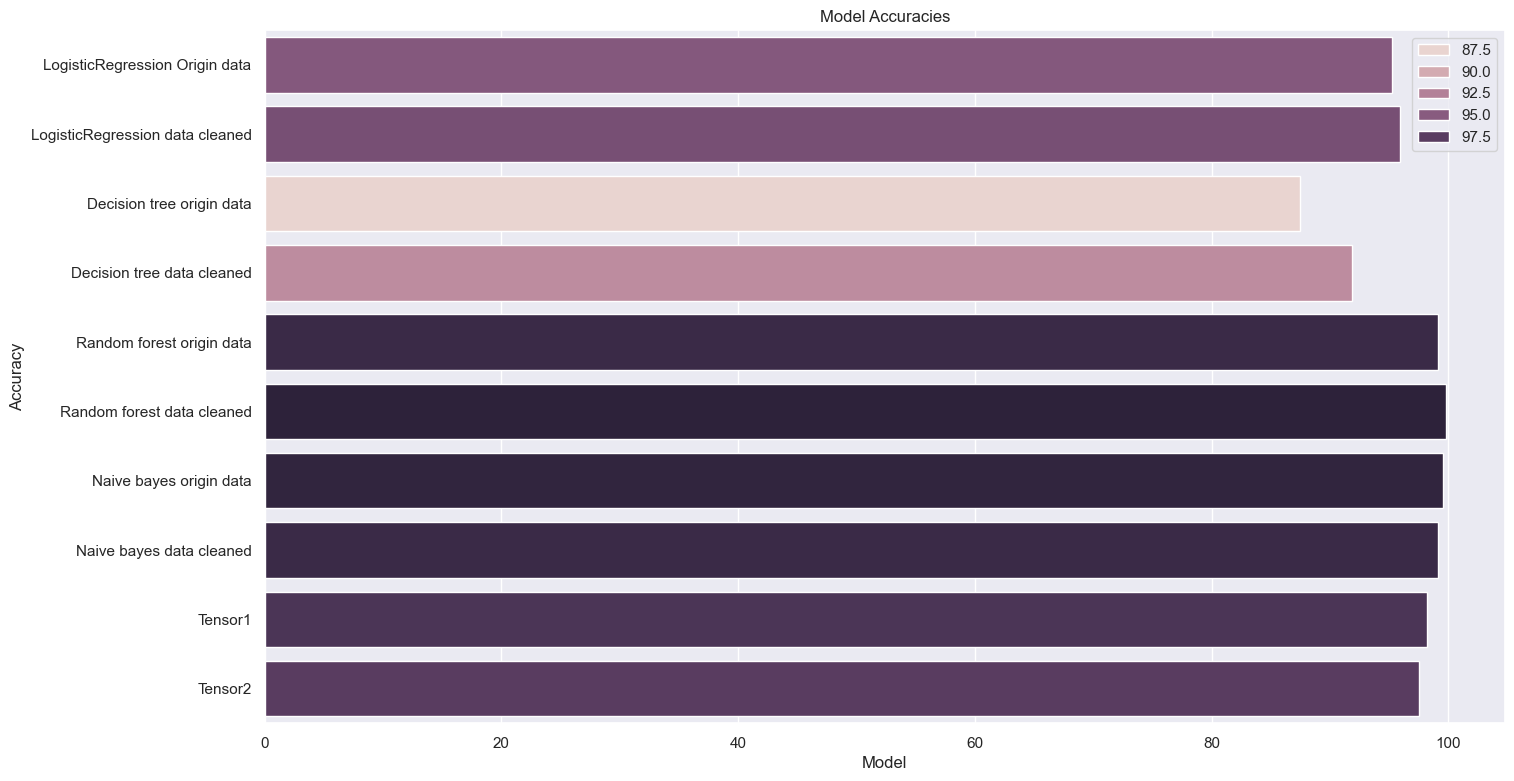

In [240]:
# Extract model names and accuracies from the best_model dictionary
accuracies = list(model_evaluate.values())
model_names = list(model_evaluate.keys())

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)

sns.barplot(x=accuracies, y=model_names, data=model_evaluate, hue=model_evaluate.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()
